In [24]:
import seaborn as sns
from pandas_summary import DataFrameSummary
import numpy as np
import pandas as pd
from IPython.display import display
pd.options.display.max_rows = 10
pd.options.display.max_columns = 100


sns.set(style="whitegrid", context='poster', rc={
    'figure.figsize': (7, 5),
    'axes.titlesize': 24,
    'axes.labelsize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16})

In [3]:
def get_string_values(col):
    return col+': '+ '; '.join([str(k)+' '+str(v)+'%' for k, v in (df[col].value_counts()/len(df)*100).round().astype(int).items()])

# Load data

In [4]:
df = pd.read_csv('data/craigslistVehiclesFull.csv')

dfs = DataFrameSummary(df)

# Study data

In [168]:
dfs.columns_stats

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
counts,1723065,1723065,1723065,1716750,1586651,1653366,1022275,1031774,1712698,1159011,1720511,1714043,604850,1061181,599098,1020134,1027415,1723064,1723065,1723065,1664232,1664232,1664232,1664232,1723065,1663637
uniques,1723065,470,30349,126,53,107445,6,8,5,172208,6,3,316208,3,4,13,12,1227536,275441,271604,3111,1834,51,51,52,26
missing,0,0,0,6315,136414,69699,700790,691291,10367,564054,2554,9022,1118215,661884,1123967,702931,695650,1,0,0,58833,58833,58833,58833,0,59428
missing_perc,0%,0%,0%,0.37%,7.92%,4.05%,40.67%,40.12%,0.60%,32.74%,0.15%,0.52%,64.90%,38.41%,65.23%,40.80%,40.37%,0.00%,0%,0%,3.41%,3.41%,3.41%,3.41%,0%,3.45%
types,unique,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical,numeric,categorical,categorical,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,numeric,categorical,numeric,categorical,categorical,numeric


# Numerical

### weather

mean                             53.7871
std                              7.79938
variance                         60.8303
min                                   29
max                                   79
5%                                    43
25%                                   48
50%                                   53
75%                                   59
95%                                   67
iqr                                   11
kurtosis                       -0.288303
skewness                       0.0902366
sum                          8.94821e+07
mad                              6.48541
cv                              0.145005
zeros_num                              0
zeros_perc                            0%
deviating_of_mean                  59450
deviating_of_mean_perc             3.45%
deviating_of_median                59450
deviating_of_median_perc           3.45%
top_correlations            lat: -85.93%
counts                           1663637
uniques         

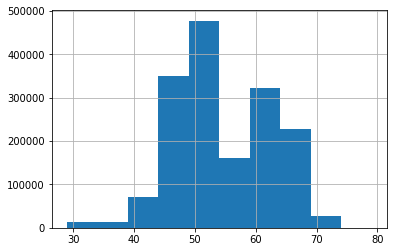

In [161]:
dfs['weather']

# Categorical

### title_status

In [158]:
get_string_values('title_status')

'clean:93%; rebuilt:3%; salvage:2%; lien:1%; missing:1%; parts only:0%'

### transmission

In [159]:
get_string_values('transmission')

'automatic:86%; manual:12%; other:2%'

### fuel

In [160]:
get_string_values('fuel')

'gas:89%; diesel:7%; other:3%; hybrid:1%; electric:0%'

### make

In [172]:
df['make'].value_counts()

1500                                               23346
f-150                                              22243
silverado 1500                                     15290
2500                                               13289
mustang                                            13136
                                                   ...  
47 Plymouth                                            1
super duty f-350 drw lariat 4wd crew cab 8' box        1
Quality Work Vehicles                                  1
1500 new body stile                                    1
ionb                                                   1
Name: make, Length: 107445, dtype: int64

### manufacturer

In [173]:
df['manufacturer'].value_counts()

ford            292841
chevrolet       219801
toyota          116737
honda            89608
nissan           79994
                 ...  
landrover           39
morgan              11
mercedesbenz         4
noble                2
hennessey            1
Name: manufacturer, Length: 53, dtype: int64

## Many nans

In [174]:
get_string_values('drive')

'4wd:26%; fwd:21%; rwd:14%'

In [179]:
get_string_values('cylinders')

'cylinders: 6 cylinders 21%; 8 cylinders 19%; 4 cylinders 17%; other 2%; 5 cylinders 1%; 10 cylinders 0%; 3 cylinders 0%; 12 cylinders 0%'

In [180]:
get_string_values('paint_color')

'paint_color: white 13%; black 12%; silver 9%; blue 7%; red 7%; grey 6%; green 3%; brown 2%; custom 1%; yellow 1%; orange 0%; purple 0%'

In [185]:
get_string_values('condition')

'condition: excellent 26%; good 22%; like new 6%; fair 4%; new 1%; salvage 0%'

In [188]:
get_string_values('type')

'type: sedan 16%; SUV 14%; truck 8%; pickup 7%; coupe 4%; hatchback 2%; convertible 2%; van 1%; wagon 1%; mini-van 1%; other 1%; offroad 0%; bus 0%'

# Remove outliers: odometer, price, year

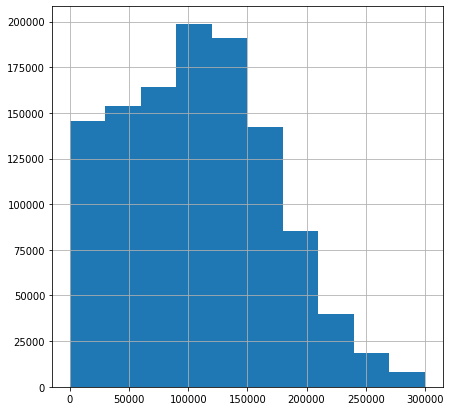

In [209]:
# f, ax = plt.subplots(figsize=(7, 7))
#  df['odometer_log'] = odometer[odometer < odometer.quantile(0.99)].hist()

In [290]:
def select_range(df, col, quantile_thresh = 0.01, side = 'both'):
    low_thresh = df[col].quantile(quantile_thresh)
    high_thres = df[col].quantile(1-quantile_thresh)
    mask_low = df[col]>low_thresh
    mask_high = df[col]<df[col].quantile(1-quantile_thresh)
    if side == 'both':
        mask = mask_low & mask_high
    elif side == 'low':
        mask = mask_low
    elif side == 'high':
        mask = mask_high
    else:
        raise('Side should be both, low or high')
    return df[col][mask], low_thresh, high_thres

Text(0.5, 1.0, 'Prices between \\$1 and \\$51999 \n(1st and 99th percentile)')

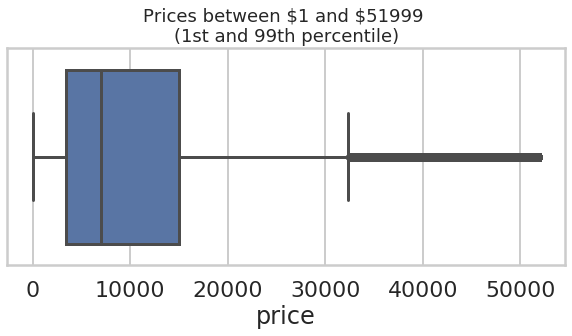

In [351]:
fig, ax = plt.subplots(figsize=(10, 4))
x, low, high = select_range(df, 'price',quantile_thresh=0.01, side = 'both')
ax = sns.boxplot(x=x)
ax.set_title('Prices between \${} and \${} \n(1st and 99th percentile)'.format(int(low), int(high)),
            fontsize =18)
#ax.fig.get_axes()[0].set_yscale('log')

Text(0.5, 1.0, 'Ferrari car prices')

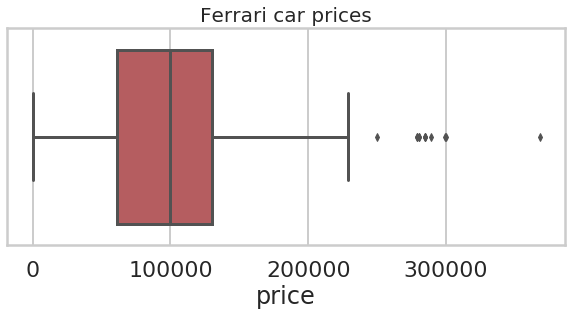

In [354]:
fig, ax = plt.subplots(figsize=(10, 4))
#x, low, high = select_range(df, 'price',quantile_thresh=0.01, side = 'both')
#The first automobile to be mass produced in the United States was the 1901

ferrari_mask = (df['manufacturer'] == 'ferrari') & (df['price']<1e6)

ax = sns.boxplot(x=df[ferrari_mask]['price'], color= 'r')
ax.set_title('Ferrari car prices',
            fontsize =20)

# Year

Text(0.5, 1.0, 'Prices between \\$1 and \\$51999 \n(1st and 99th percentile)')

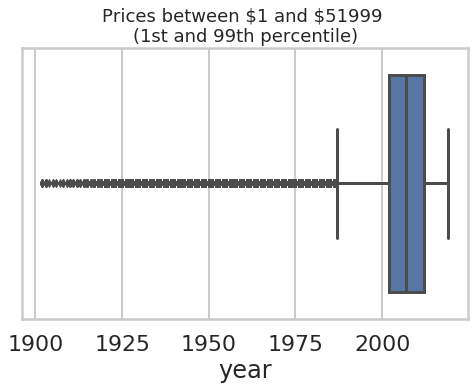

In [303]:
fig, ax = plt.subplots(figsize=(8, 5))
#x, low, high = select_range(df, 'price',quantile_thresh=0.01, side = 'both')
#The first automobile to be mass produced in the United States was the 1901
mask = df['year']>1901
ax = sns.boxplot(x=df[mask]['year'])
ax.set_title('Prices between \${} and \${} \n(1st and 99th percentile)'.format(int(low), int(high)),
            fontsize =18)
#ax.fig.get_axes()[0].set_yscale('log')

# Which manufacturer produces the fleet of cars with the best resale value

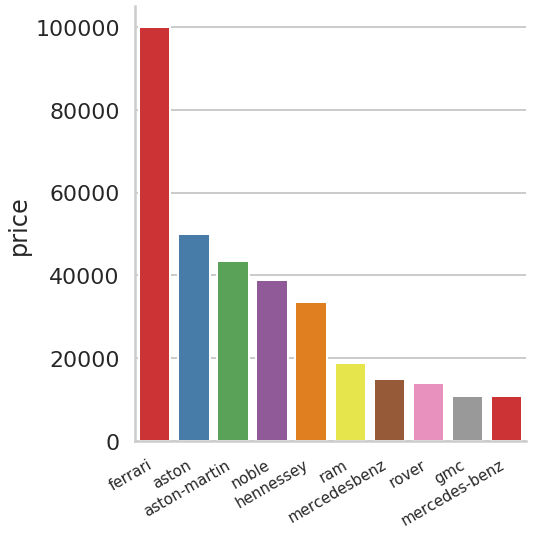

In [426]:
fig, ax = plt.subplots(figsize=(7, 8))

df_manufacturer_medians = df[['manufacturer','price']].dropna().groupby('manufacturer').median().sort_values('price', ascending = False)

ax = sns.barplot(x="manufacturer", y="price", data=df_manufacturer_medians.reset_index()[:10],
                palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right', fontsize = 15)
ax.set_xlabel('')
sns.despine()

In [431]:
df[ferrari_mask]['price'].max()

3450000

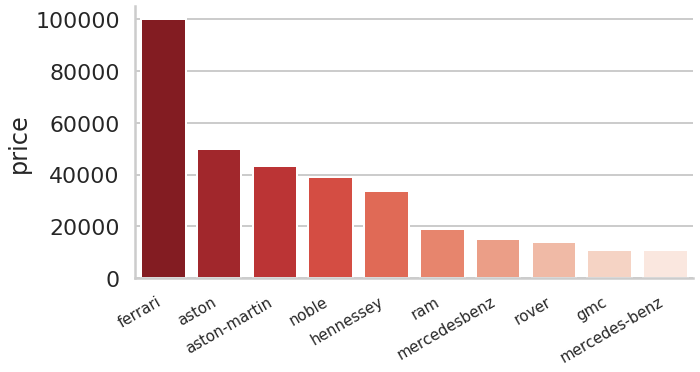

In [442]:
fig, ax = plt.subplots(figsize=(10, 5))

ferrari_mask = (df['manufacturer'] == 'ferrari')

ax = sns.barplot(x="manufacturer", y="price", data=df_manufacturer_medians.reset_index()[:10],
                palette="Reds_r")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right', fontsize = 15)
ax.set_xlabel('')
sns.despine()

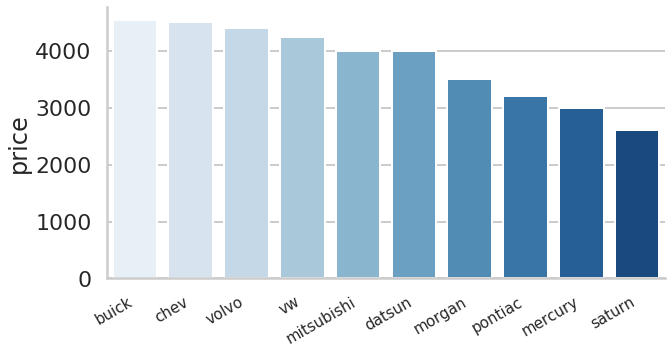

In [444]:
fig, ax = plt.subplots(figsize=(10, 5))

#ferrari_mask = (df['manufacturer'] == 'ferrari')

ax = sns.barplot(x="manufacturer", y="price", data=df_manufacturer_medians.reset_index()[-10:],
                palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right', fontsize = 15)
ax.set_xlabel('')
sns.despine()

[]

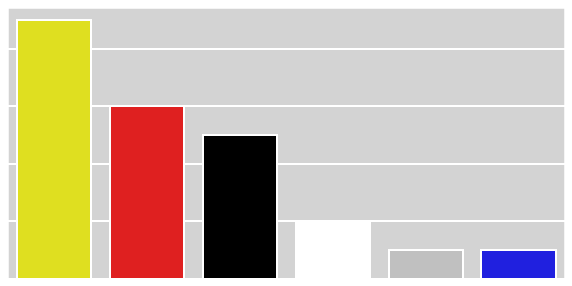

In [249]:
#sns.set_style("darkgrid", {"axes.facecolor": ".7"})
sns.set(context = 'poster', 
        rc={'axes.facecolor':'lightgray', })#'figure.facecolor':''

fig, ax = plt.subplots(figsize=(10, 5))
ferrari_mask = (df['manufacturer'] == 'ferrari')
df_ferrari = df[ferrari_mask].dropna().groupby('paint_color')['manufacturer'].count().sort_values(ascending = False).reset_index().rename(columns = {'manufacturer':'count'})

ax = sns.barplot(x="paint_color", y="count", data=df_ferrari,
                 palette =df_ferrari["paint_color"])

#ax.set_title('Ferrari paint colors')
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xticklabels([])
ax.set_yticklabels([])

In [257]:
df[ferrari_mask].dropna().groupby('paint_color').count()['price']

paint_color
black     5
blue      1
red       6
silver    1
white     2
yellow    9
Name: price, dtype: int64

[]

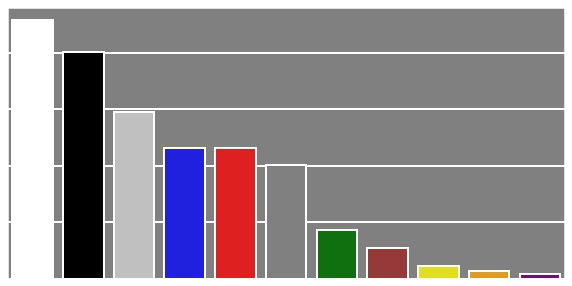

In [526]:
#sns.set_style("darkgrid", {"axes.facecolor": ".7"})
sns.set(context = 'poster', 
        rc={'axes.facecolor':'gray', })#'figure.facecolor':''

fig, ax = plt.subplots(figsize=(10, 5))
color_mask = df['paint_color']!='custom'
df_ferrari = df[color_mask][['paint_color','price']].dropna().groupby('paint_color')['price'].count().sort_values(ascending = False).reset_index().rename(columns = {'price':'count'})

ax = sns.barplot(x="paint_color", y="count", data=df_ferrari,
                 palette =df_ferrari["paint_color"])

#ax.set_title('Ferrari paint colors')
ax.set_xlabel('')
ax.set_ylabel('')

ax.set_xticklabels([])
ax.set_yticklabels([])

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ferrari_mask = (df['manufacturer'] == 'ferrari')

ax = sns.barplot(x="manufacturer", y="price", data=df_manufacturer_medians.reset_index()[-10:],
                palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30, ha='right', fontsize = 15)
ax.set_xlabel('')
sns.despine()

In [447]:
df[(df['manufacturer'] == 'saturn')]['price'].median()

2599.0

In [304]:
# import matplotlib.pyplot as plt
# f, ax = plt.subplots(figsize=(10, 10))

# sns.scatterplot(x ='odometer', y = 'price', data = df)

# lat long map

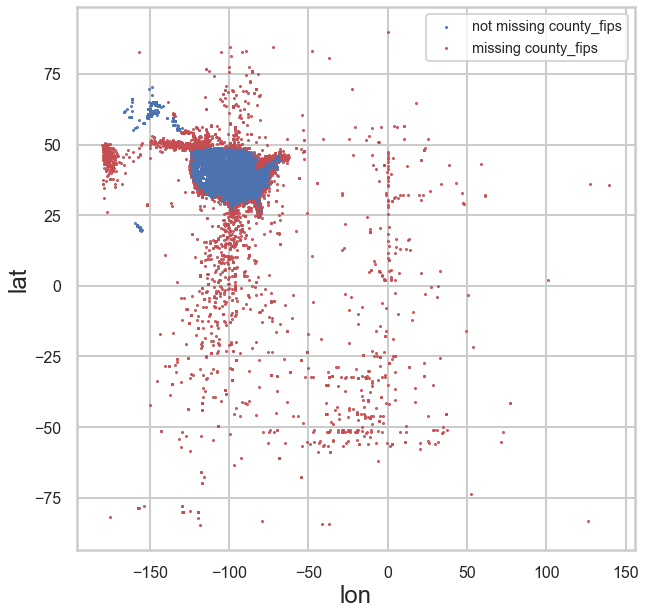

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

mask = df['county_fips'].isnull()
maskx = df['long']>-200

df_plot = df[~mask&maskx]
plt.scatter(x='long', y='lat', data = df_plot, s = 1, color='b')

df_plot = df[mask&maskx]
plt.scatter(x='long', y='lat', data = df_plot, s = 1, color='r')

ax.legend(['not missing county_fips', 
                 'missing county_fips'],
                fontsize='x-large', title_fontsize='30')

ax.set_xlabel('lon')
ax.set_ylabel('lat')
plt.show()

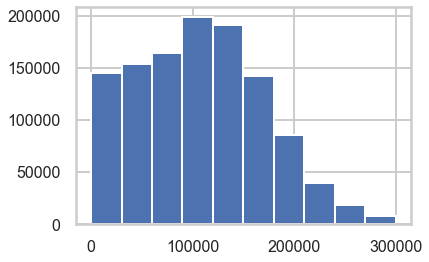

In [32]:

df['odometer_log'] = odometer[odometer < odometer.quantile(0.99)].hist()

In [62]:
df['condition'].value_counts().index

Index(['excellent', 'good', 'like new', 'fair', 'new', 'salvage'], dtype='object')

/Users/kirkansin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


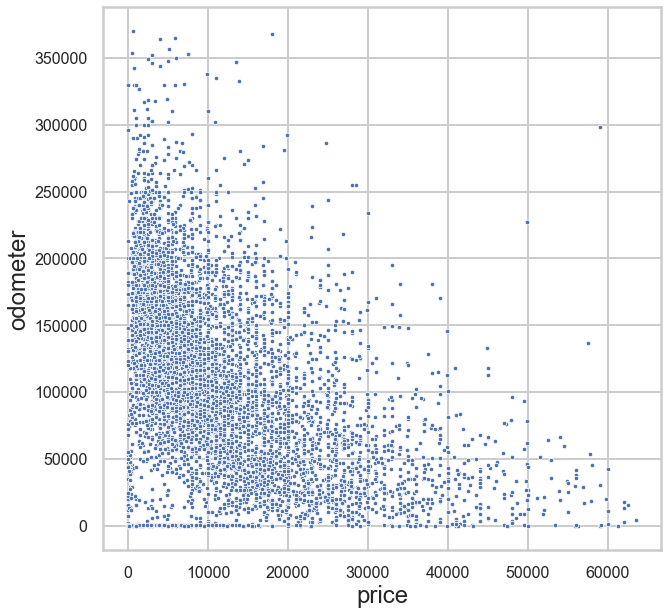

In [81]:
df_plot = df.sample(10000)
odometer = df['odometer']
price = df['price']

mask1 = odometer < odometer.quantile(0.995)
mask2 = price < price.quantile(0.995)
mask3 = ~(df['condition'].apply(lambda x: x == 'new') & 
          df['condition'].apply(lambda x: x == 'like new') &
          df['condition'].apply(lambda x: x == 'excellent') )

df_plot= df_plot[mask1&mask2&mask3]

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='price', y='odometer', data = df_plot, s=20)

/Users/kirkansin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


(0, 372599.64989713853)

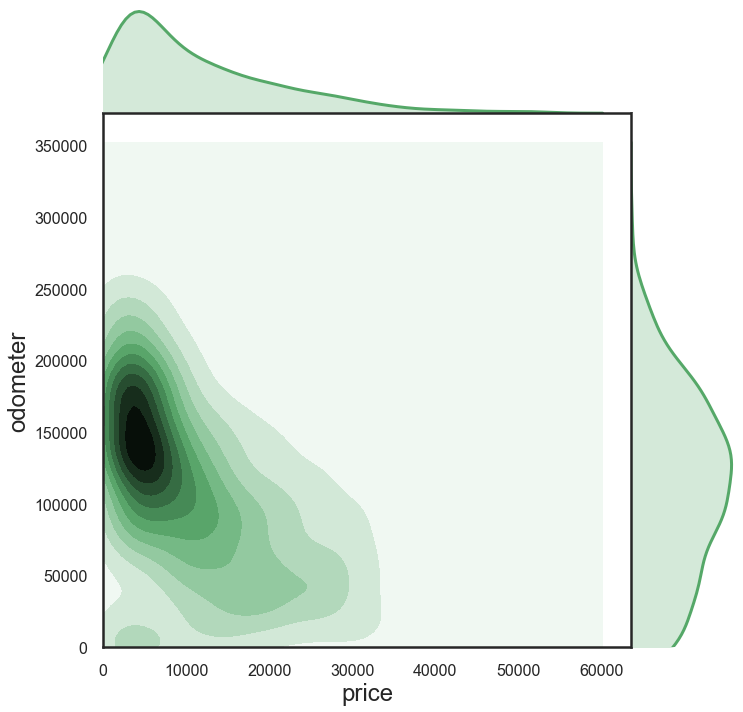

In [83]:
df_plot = df.sample(1000)
odometer = df['odometer']
price = df['price']

mask1 = odometer < odometer.quantile(0.99)
mask2 = price < price.quantile(0.99)
mask3 = ~(df['condition'].apply(lambda x: x == 'new') & 
          df['condition'].apply(lambda x: x == 'like new') &
          df['condition'].apply(lambda x: x == 'excellent') )

df_plot= df_plot[mask1&mask2&mask3]
with sns.axes_style('white'):
    plot = sns.jointplot(x='price', y='odometer', data = df_plot,
                  kind="kde", space=0, color="g",
                 height = 10)

plot.ax_marg_x.set_xlim(0, )
plot.ax_marg_y.set_ylim(0, )


# Linear regression

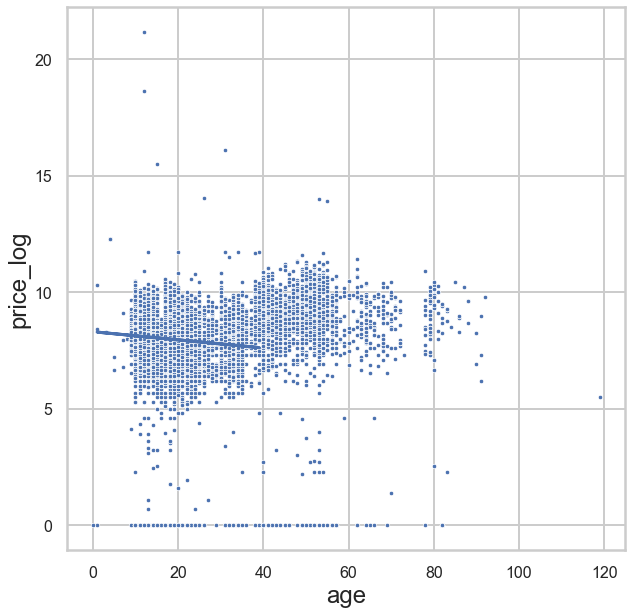

In [16]:
from sklearn.linear_model import LinearRegression

df['age']= df['year'].max() - df['year']
df['price_log'] = np.log(df['price'])

for manufacturer in ['pontiac']:
    odometer = df['odometer']
    price = df['price']

    mask1 = odometer < odometer.quantile(0.995)
    mask2 = price < price.quantile(0.995)
    mask3 = ~(df['condition'].apply(lambda x: x == 'new') & 
              df['condition'].apply(lambda x: x == 'like new') &
              df['condition'].apply(lambda x: x == 'excellent') )
    mask4 = df['age']<40
    mask5 = df['manufacturer'] == manufacturer

    df_plot= df[mask5]#.sample(100000)

    fig, ax = plt.subplots(figsize=(10, 10))
    sns.scatterplot(x='age', y='price_log', data = df_plot, s=20)


    lr = LinearRegression()
    df_plot = df[mask1&mask2&mask3&mask4&mask5]
    lr.fit(df_plot['age'].values[:,np.newaxis],df_plot['price_log'] )

    #plt.plot(x='age', y='price_log', data = df_plot, s=20)
    x = df_plot['age']
    plt.plot(x, lr.predict(x[:, np.newaxis]), '-')

In [17]:
df['price_log'] = np.log(df['price'])

In [18]:
manufacturer

'pontiac'

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Log Price')

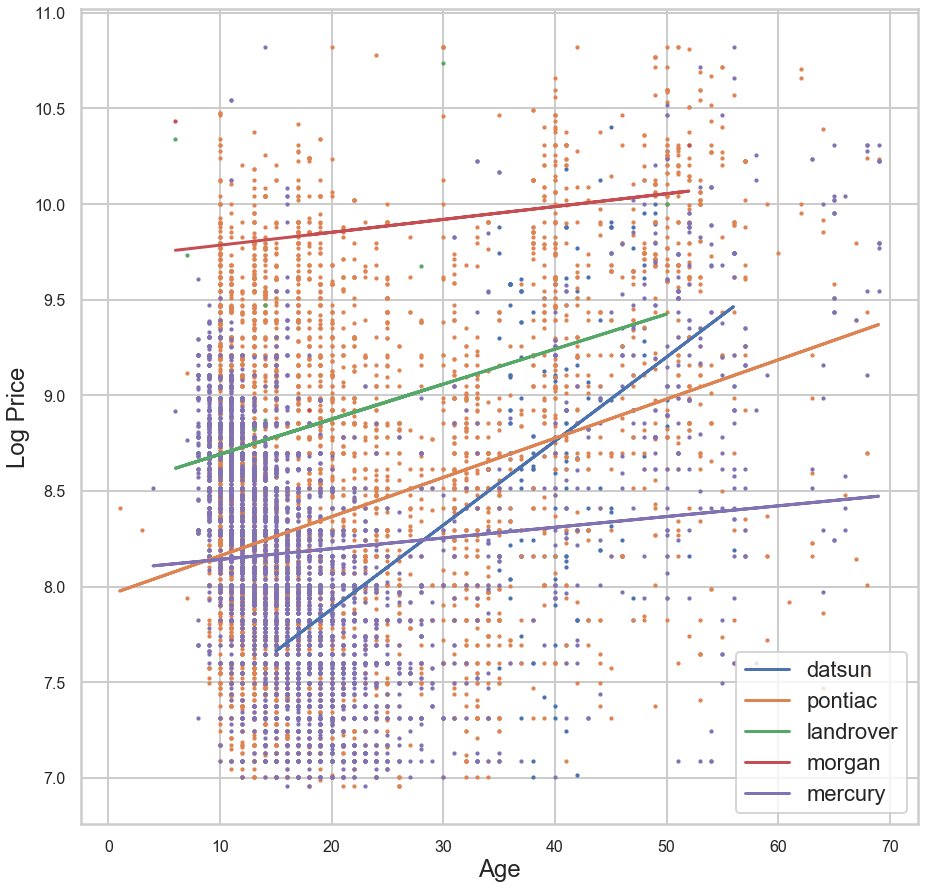

In [20]:
odometer = df['odometer']
price = df['price']

fig, ax = plt.subplots(figsize=(15, 15))

res = {}
#for manufacturer in list(set(df.manufacturer.dropna())): 
for manufacturer in ['datsun', 'pontiac', 'landrover', 'morgan', 'mercury']: 

    mask1 = odometer < odometer.quantile(0.99)
    mask2 = (price < price.quantile(0.99) ) &  (price > price.quantile(0.01))
    # mask3 = ~(df['condition'].apply(lambda x: x == 'new') & 
    #           df['condition'].apply(lambda x: x == 'like new') &
    #           df['condition'].apply(lambda x: x == 'excellent') )
    mask4 = (df['age']<70) & ( df['price']>1000)
    mask5 = df['manufacturer'] == manufacturer
    
    sample_size = 1000000
    df_plot = df[mask1&mask2&mask4&mask5]
    if len(df_plot)>sample_size:
        df_plot= df_plot.sample(sample_size)
        
    if len(df_plot)<2:
        continue
    
    
    plt.scatter(x=df_plot['age'], y=df_plot['price_log'],  s=5)


    lr = LinearRegression()
    df_plot = df_plot[['age','price_log']].dropna()

    lr.fit(df_plot['age'].values[:,np.newaxis],df_plot['price_log'])

    x = df_plot['age']
    plt.plot(x, lr.predict(x[:, np.newaxis]), '-', label = manufacturer)
    
    res[manufacturer] = {'intercept':lr.intercept_,'coef':lr.coef_[0]}

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel('Age')
ax.set_ylabel('Log Price')

Text(0, 0.5, 'Price')

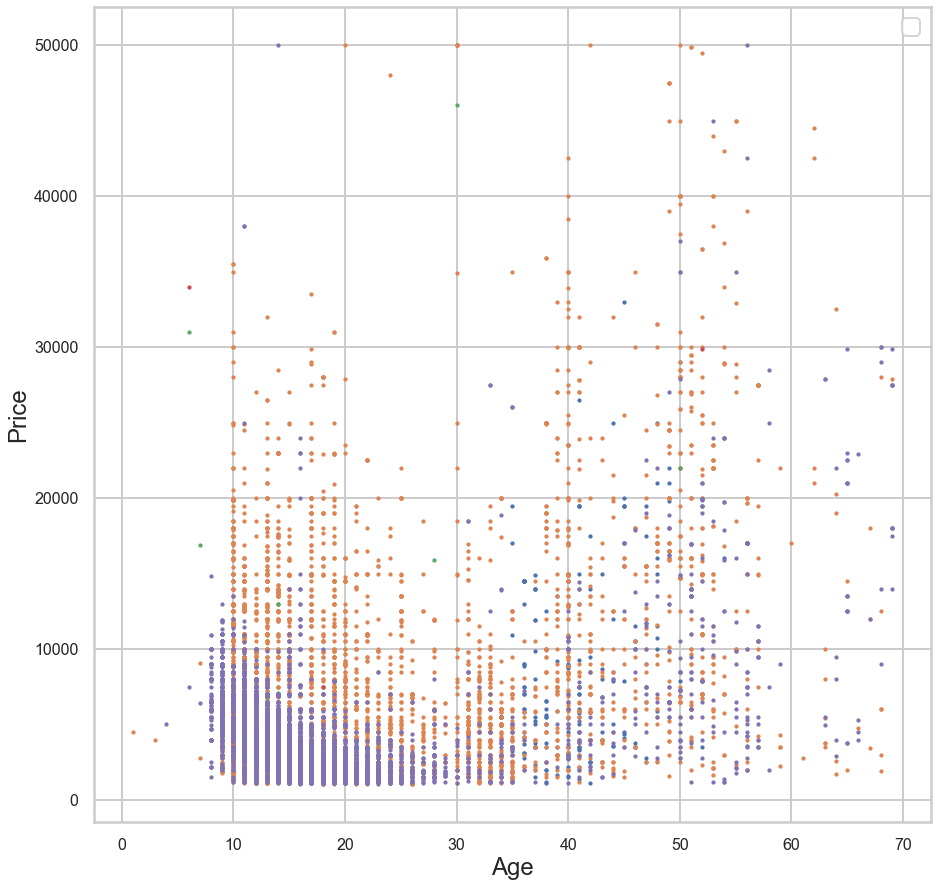

In [22]:
odometer = df['odometer']
price = df['price']

fig, ax = plt.subplots(figsize=(15, 15))

res = {}
#for manufacturer in list(set(df.manufacturer.dropna())): 
for manufacturer in ['datsun', 'pontiac', 'landrover', 'morgan', 'mercury']: 

    mask1 = odometer < odometer.quantile(0.99)
    mask2 = (price < price.quantile(0.99) ) &  (price > price.quantile(0.01))
    # mask3 = ~(df['condition'].apply(lambda x: x == 'new') & 
    #           df['condition'].apply(lambda x: x == 'like new') &
    #           df['condition'].apply(lambda x: x == 'excellent') )
    mask4 = (df['age']<70) & ( df['price']>1000)
    mask5 = df['manufacturer'] == manufacturer
    
    sample_size = 1000000
    df_plot = df[mask1&mask2&mask4&mask5]
    if len(df_plot)>sample_size:
        df_plot= df_plot.sample(sample_size)
        
    if len(df_plot)<2:
        continue
    
    
    plt.scatter(x=df_plot['age'], y=df_plot['price'],  s=5)


#     lr = LinearRegression()
#     df_plot = df_plot[['age','price_log']].dropna()

#     lr.fit(df_plot['age'].values[:,np.newaxis],df_plot['price_log'])

#     x = df_plot['age']
#     plt.plot(x, lr.predict(x[:, np.newaxis]), '-', label = manufacturer)
    
    res[manufacturer] = {'intercept':lr.intercept_,'coef':lr.coef_[0]}

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.set_xlabel('Age')
ax.set_ylabel('Price')

/Users/kirkansin/anaconda3/lib/python3.6/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/kirkansin/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


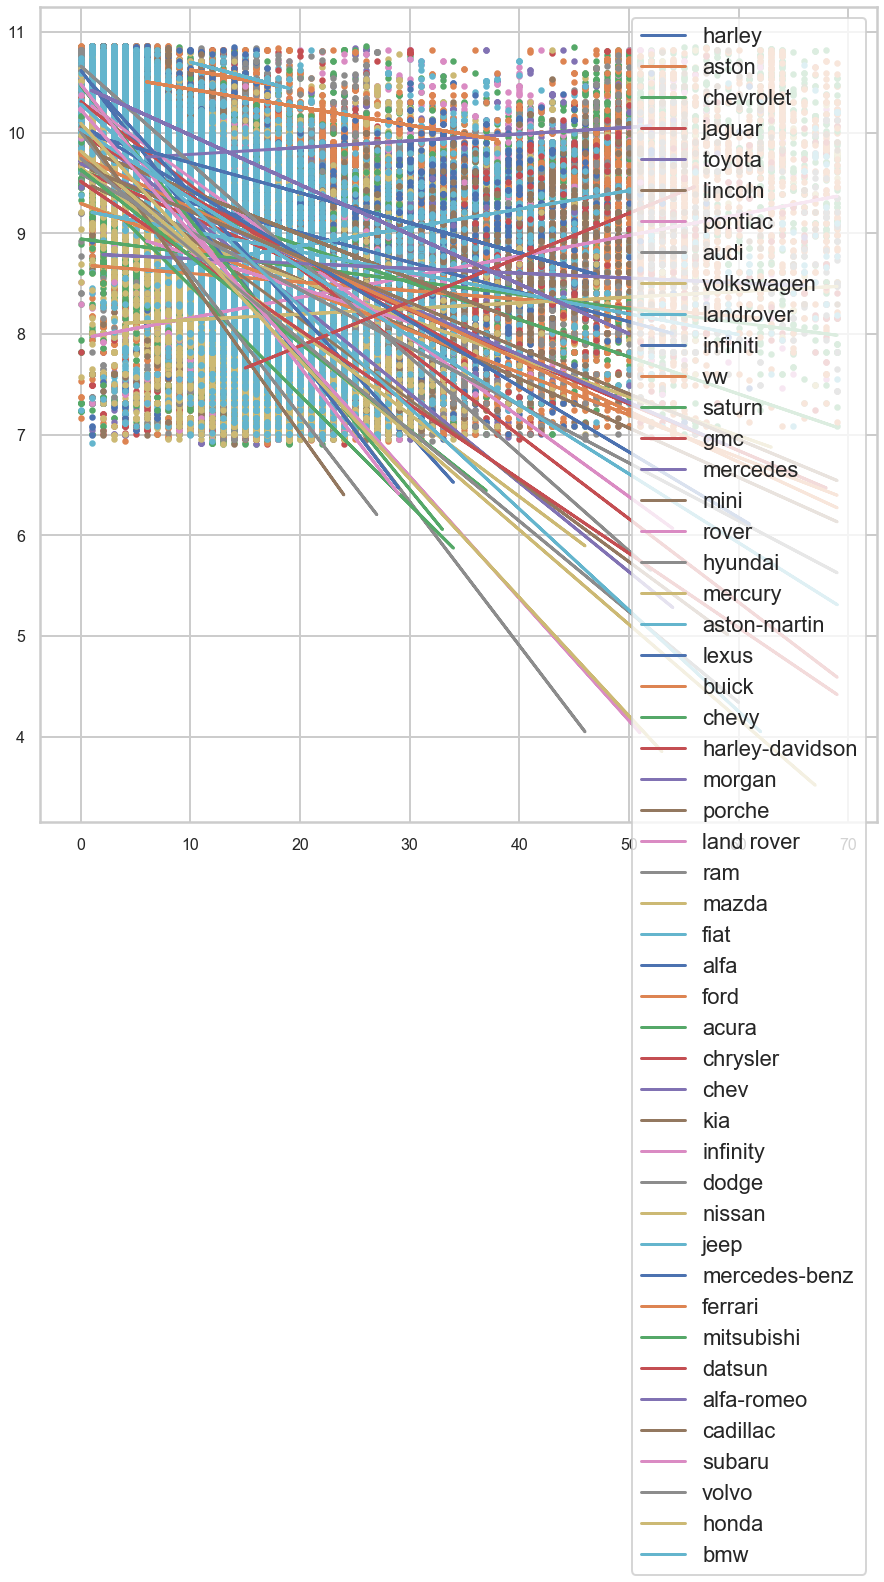

In [242]:
odometer = df['odometer']
price = df['price']

fig, ax = plt.subplots(figsize=(15, 15))

res = {}
for manufacturer in list(set(df.manufacturer.dropna())): 
#for manufacturer in ['datsun','pontiac']: 

    mask1 = odometer < odometer.quantile(0.995)
    mask2 = (price < price.quantile(0.99) ) &  (price > price.quantile(0.01))
    # mask3 = ~(df['condition'].apply(lambda x: x == 'new') & 
    #           df['condition'].apply(lambda x: x == 'like new') &
    #           df['condition'].apply(lambda x: x == 'excellent') )
    mask4 = (df['age']<70) & ( df['price']>1000)
    mask5 = df['manufacturer'] == manufacturer
    
    sample_size = 1000000
    df_plot = df[mask1&mask2&mask4&mask5]
    if len(df_plot)>sample_size:
        df_plot= df_plot.sample(sample_size)
        
    if len(df_plot)<2:
        continue
    
    
    plt.scatter(x=df_plot['age'], y=df_plot['price_log'],  s=20)


    lr = LinearRegression()
    df_plot = df_plot[['age','price_log']].dropna()

    lr.fit(df_plot['age'].values[:,np.newaxis],df_plot['price_log'])

    x = df_plot['age']
    plt.plot(x, lr.predict(x[:, np.newaxis]), '-', label = manufacturer)
    
    res[manufacturer] = {'intercept':lr.intercept_,'coef':lr.coef_[0]}

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

In [234]:
res = pd.Series(res).apply(pd.Series)

In [239]:
res['coef'].sort_values(ascending = False)[:10].to_frame().index

Index(['datsun', 'pontiac', 'landrover', 'morgan', 'mercury', 'chev', 'vw',
       'chevy', 'fiat', 'ferrari'],
      dtype='object')

In [211]:
df[df['manufacturer'] == 'pontiac']

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather,age,price_log
307,https://lascruces.craigslist.org/cto/d/1983-tr...,lascruces,6995,1983.0,pontiac,firebird trans am,good,8 cylinders,gas,NaN,rebuilt,manual,NaN,rwd,mid-size,coupe,white,https://images.craigslist.org/00T0T_de0Td7kx5q...,31.76740,-106.43040,48141.0,El Paso,48.0,TX,Texas,67.0,36.0,8.852951
407,https://lakecity.craigslist.org/cto/d/2006-pon...,lakecity,500,2006.0,pontiac,g6,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00W0W_kvv9jE7m3o...,30.10550,-82.68780,12023.0,Columbia,12.0,FL,Florida,65.0,13.0,6.214608
449,https://charlotte.craigslist.org/cto/d/2007-po...,charlotte,3000,2007.0,pontiac,g6,good,4 cylinders,gas,193000.0,clean,automatic,NaN,NaN,NaN,NaN,silver,https://images.craigslist.org/01111_1eC6dHGWk6...,35.22900,-80.84190,37119.0,Mecklenburg,37.0,NC,North Carolina,56.0,12.0,8.006368
457,https://charlotte.craigslist.org/cto/d/2006-po...,charlotte,2200,2006.0,pontiac,g6,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00j0j_8Gn0AoeQVm...,35.33440,-81.77070,37161.0,Rutherford,37.0,NC,North Carolina,56.0,13.0,7.696213
498,https://wilmington.craigslist.org/cto/d/2007-p...,wilmington,2600,2007.0,pontiac,g6,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00p0p_1IoHlwn2rv...,34.89570,-78.04320,37061.0,Duplin,37.0,NC,North Carolina,56.0,12.0,7.863267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722937,https://binghamton.craigslist.org/cto/d/pontia...,binghamton,1,1963.0,pontiac,NaN,NaN,NaN,gas,NaN,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00z0z_7kpy2pD2xf...,40.94710,-74.24660,34031.0,Passaic,34.0,NJ,New Jersey,52.0,56.0,0.000000
1722945,https://lincoln.craigslist.org/cto/d/y82-bandi...,lincoln,39999,1977.0,pontiac,trans am,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00x0x_cJcGg2d1MD...,44.37670,-103.72960,46081.0,Lawrence,46.0,SD,South Dakota,38.0,42.0,10.596610
1722953,https://northmiss.craigslist.org/cto/d/2006-po...,northmiss,800,2006.0,pontiac,g6,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_8lpFoLUFU1...,33.77510,-89.80870,28043.0,Grenada,28.0,MS,Mississippi,61.0,13.0,6.684612
1722978,https://muncie.craigslist.org/cto/d/pontiac-gr...,muncie,2750,2006.0,pontiac,grand prix,NaN,NaN,gas,147.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00e0e_cqP2G8MJgB...,39.92080,-85.36630,18065.0,Henry,18.0,IN,Indiana,48.0,13.0,7.919356
